In [1297]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [1298]:
%load_ext autoreload
%autoreload 2
from task7 import (left_rectangle_method,
                   mid_rectangle_method,
                   trapezoidal_method,
                   simpson_method,
                   newton_cotes_3point,
                   gauss_3point, 
                   Richardson_newton, 
                   Richardson_gauss, 
                   Runge
                   )


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1299]:
a = 1.1
b = 2.5
alpha = 2 / 5
beta = 0
n = 100
e = 10**(-6)

In [1300]:
def f(x):
    """ Пользовательская функция. """
    return 0.5 * np.cos(2 * x) * np.exp(2 * x / 5) + 2.4 * np.sin(1.5 * x) * np.exp(-6 * x) + 6 * x


In [1301]:
def F(x):
    """ Пользовательская функция. """
    return f(x) / (x - a) ** alpha


# Вывод

In [1302]:
print(f"Интервал: [{a}, {b}]\nКол-во разбиений: {n}\n")

print(f"Точное значение: {scipy.integrate.quad(f, a, b)[0]}\n")
print(f"Метод левых прямоугольников: {left_rectangle_method(f, a, b, n)}")
print(f"Метод средних прямоугольников: {mid_rectangle_method(f, a, b, n)}")
print(f"Метод трапеции: {trapezoidal_method(f, a, b, n)}")
print(f"Метод Симпсона: {simpson_method(f, a, b, n)}\n")

print(f"Точное значение: {scipy.integrate.quad(F, a, b)[0]}\n")
print(f"Метод Ньютона-Котса: {newton_cotes_3point(f, a, b, n, alpha)}")
print(f"Метод Гаусса 3-точечный: {gauss_3point(f, a, b, n, alpha)}")

Интервал: [1.1, 2.5]
Кол-во разбиений: 100

Точное значение: 14.273140902433548

Метод левых прямоугольников: 14.208535644088457
Метод средних прямоугольников: 14.273106447533289
Метод трапеции: 14.2732098115549
Метод Симпсона: 14.273140898811029

Точное значение: 18.60294785732018

Метод Ньютона-Котса: 18.602947852949427
Метод Гаусса 3-точечный: 18.618736418255995


# График Абсолютной погрешности

In [1303]:
# Диапазон значений n
n_values = np.arange(2, 400, 5)

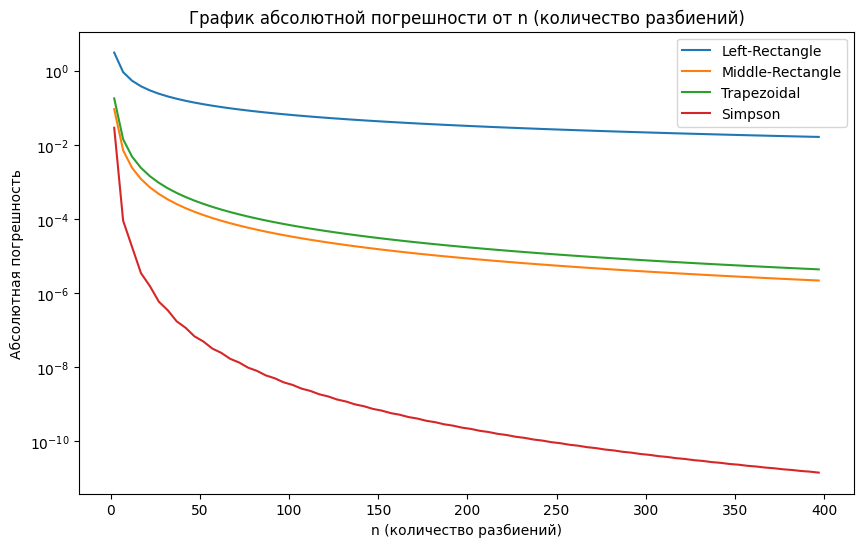

In [1304]:
# Истинное значение интеграла
true_value_1, true_value_err_1 = scipy.integrate.quad(f, a, b)

# Список методов
methods = {
    "Left-Rectangle": left_rectangle_method,
    "Middle-Rectangle": mid_rectangle_method,
    "Trapezoidal": trapezoidal_method,
    "Simpson": simpson_method,
}

# Для каждого метода и значения n вычислите абсолютную погрешность
errors = {method: [] for method in methods}

for n in n_values:
    for method_name, method in methods.items():
        approx_value = method(f, a, b, n)
        error = abs(approx_value - true_value_1)
        errors[method_name].append(error)

# Построение графиков
plt.figure(figsize=(10, 6))
for method_name, error_values in errors.items():
    plt.plot(n_values, error_values, label=method_name)

plt.xlabel("n (количество разбиений)")
plt.ylabel("Абсолютная погрешность")
plt.yscale("log")  # Логарифмическая шкала для более наглядного отображения погрешностей
plt.legend()
plt.title("График абсолютной погрешности от n (количество разбиений)")
plt.show()


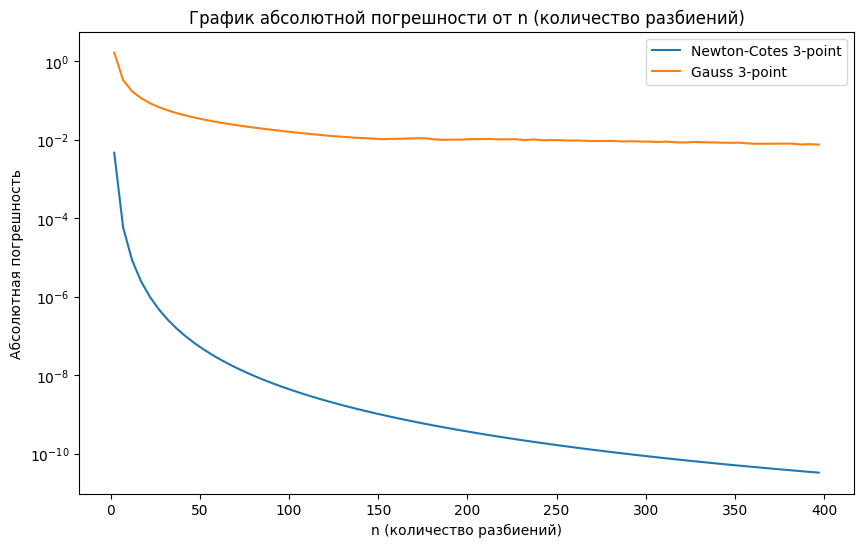

In [1305]:
# Истинное значение интеграла
true_value_2, true_value_err_2 = scipy.integrate.quad(F, a, b)

# Список методов
methods = {
    "Newton-Cotes 3-point": newton_cotes_3point,
    "Gauss 3-point": gauss_3point
}

# Для каждого метода и значения n вычислите абсолютную погрешность
errors = {method: [] for method in methods}

for n in n_values:
    for method_name, method in methods.items():
        approx_value = method(f, a, b, n, alpha)
        error = abs(approx_value - true_value_2)
        errors[method_name].append(error)

# Построение графиков
plt.figure(figsize=(10, 6))
for method_name, error_values in errors.items():
    plt.plot(n_values, error_values, label=method_name)

plt.xlabel("n (количество разбиений)")
plt.ylabel("Абсолютная погрешность")
plt.yscale("log")  # Логарифмическая шкала для более наглядного отображения погрешностей
plt.legend()
plt.title("График абсолютной погрешности от n (количество разбиений)")
plt.show()


In [1306]:
Richardson_newton(f, a, b, 10, alpha, e)


J(f) из системы: 18.60294784733571
Порядок сходимости m: 3.571948589495576
Вектор найденных коэффициентов C_m:
 [0.0183084]
Оценка погрешности: 1.3721451772146293e-06
J(f) ~= 18.60294911329271
----------------------------------------------------------------------------------------

J(f) из системы: 18.602947857489305
Порядок сходимости m: 3.578903329463578
Вектор найденных коэффициентов C_m:
 [ 0.01900431 -0.00308783]
Оценка погрешности: 1.163417726599137e-07
J(f) ~= 18.602947963941663
----------------------------------------------------------------------------------------
r = 2
Длина шага разбиения, при котором была достигнута требуемая точность: 0.034999999999999996


In [1307]:
Richardson_gauss(f, a, b, 10, alpha, e)


J(f) из системы: 18.60032135616006
Порядок сходимости m: 1.1452242248076818
Вектор найденных коэффициентов C_m:
 [-2.03290416]
Оценка погрешности: 0.09671530445434164
J(f) ~= 18.742892304150836
----------------------------------------------------------------------------------------

J(f) из системы: 18.608303885936607
Порядок сходимости m: 1.2415782214218396
Вектор найденных коэффициентов C_m:
 [-2.4544103   0.63695845]
Оценка погрешности: 0.03787311375988721
J(f) ~= 18.661055473337374
----------------------------------------------------------------------------------------

J(f) из системы: 18.614207007402495
Порядок сходимости m: 2.2061140491734315
Вектор найденных коэффициентов C_m:
 [  -85.50192308  1105.9732522  -4318.3336144 ]
Оценка погрешности: 0.00897535217499395
J(f) ~= 18.622433053897833
----------------------------------------------------------------------------------------

J(f) из системы: 18.567411884928898
Порядок сходимости m: -0.5660832771849085
Вектор найденных коэфф

ValueError: Уравнение не имеет трёх действительных корней.

In [1229]:
Runge(f, a, b, 10, alpha, e)

iteration: 1
Оптимальное кол-во интервалов: 20
Оптимальный шаг: 0.06390683969671603
Приближенное значение интеграла: 18.602947858302002
Порядок сходимости m: 3.5614335118206726
Текущая оценка погрешности: 1.3831114710079352e-06
iteration: 2
Оптимальное кол-во интервалов: 40
Оптимальный шаг: 0.12787199732018942
Приближенное значение интеграла: 18.602947857373117
Порядок сходимости m: 3.571948589495576
Текущая оценка погрешности: 1.1622558716290947e-07
